# Modelo de Regresión Logística

La regresión de tipo logaritmica, permite pronosticar a las variables categóricas.
Las variables categóricas son variables que cuentan con un número finito de valores, generalmente asociado a una característica caulitativa, como por ejemplo el sexo Hombre o Mujer, la cual se puede transformar a 1 si es Hombre y 0 si es mujer.



Por lo que utilizaremos una base de datos extraída de la clases del módulo 1 del Diplomado en Modelos Estadísticos para Negocios, Finanzas y 
Econonía impartida en el ITAM durante el ciclo 2020-2021.

In [1]:
library(ggplot2)
library(prob)
library(tidyverse)
library(dplyr)

Loading required package: combinat


Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn


Loading required package: fAsianOptions

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics

Loading required package: fOptions


Attaching package: ‘prob’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks timeSeries::filter(), stats::filter()
✖ dplyr::lag()    masks timeSeries::lag(), stats::lag()



In [2]:
getwd()

[1] "/datos/propedeutico_desde_2019/propedeutico_2021/practica-final-verano-2021-Juanes8"

In [3]:
datos <- read.csv(file='Datos_pf.csv')

In [4]:
print(head(datos))

  Salario edad escolaridad          empleo genero Escolaridad Empleo Genero  X
1   12000   57      Basica  Tiempo Parcial      M           0      0      0 NA
2   22400   48    Superior Tiempo Completo      M           1      1      0 NA
3   13200   38      Basica  Tiempo Parcial      M           0      0      0 NA
4    7500   27    Superior  Tiempo Parcial      M           1      0      0 NA
5   11100   23    Superior  Tiempo Parcial      H           1      0      1 NA
6   12700   22    Superior  Tiempo Parcial      M           1      0      0 NA
  X.1 X.2 X.3 X.4        Superior
1  NA  NA  NA  NA Tiempo Completo
2  NA  NA  NA  NA               H
3  NA  NA  NA  NA                
4  NA  NA  NA  NA                
5  NA  NA  NA  NA                
6  NA  NA  NA  NA                


Observamos la información que tenemos de la base datos, dentro de la misma ya se encuentra una columna con las variables categóricas asociadas, por lo que realizamos una selección de los datos con los que estaremos trabajando 

In [5]:
datos<-datos%>%select(Salario,edad,escolaridad,empleo,genero,Escolaridad,Empleo,Genero)

In [6]:
print(head(datos))

  Salario edad escolaridad          empleo genero Escolaridad Empleo Genero
1   12000   57      Basica  Tiempo Parcial      M           0      0      0
2   22400   48    Superior Tiempo Completo      M           1      1      0
3   13200   38      Basica  Tiempo Parcial      M           0      0      0
4    7500   27    Superior  Tiempo Parcial      M           1      0      0
5   11100   23    Superior  Tiempo Parcial      H           1      0      1
6   12700   22    Superior  Tiempo Parcial      M           1      0      0


Ya con la información seleccionada procedemos a realizar una gráfica con los datos de edad y salario haciendo una distinción entre el genero de las personas.

In [7]:
informacion <- ggplot()

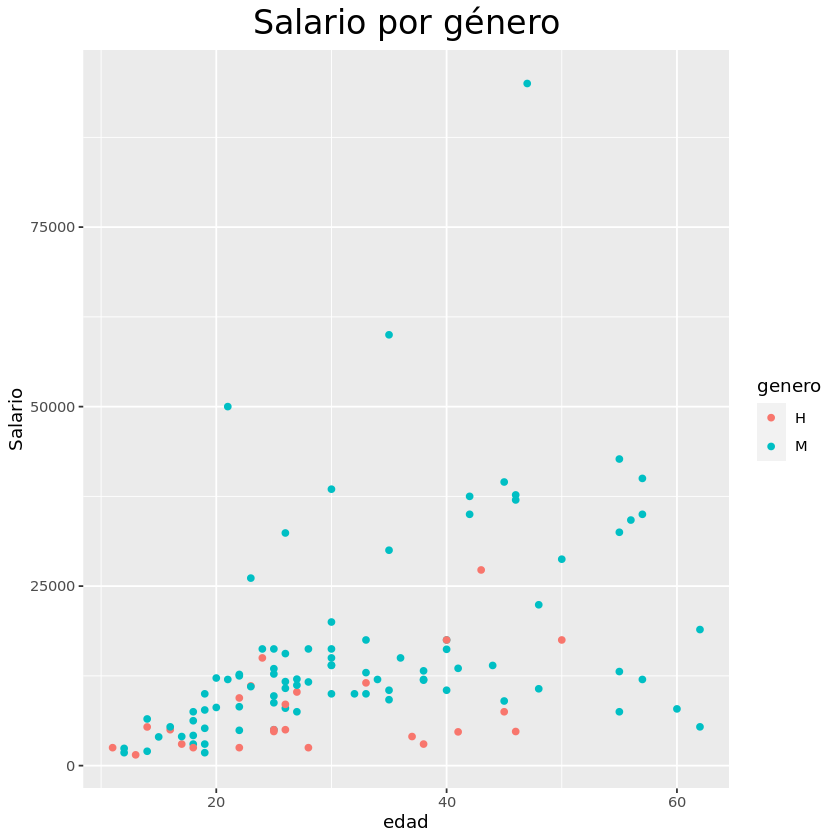

In [8]:
informacion + geom_point(datos, mapping = aes (x=edad, y=Salario, color=genero)) +
ggtitle ('Salario por género') + theme(plot.title =element_text (size=20, hjust=0.5))

A partir de la gráfica podemos observar que el grueso de los datos son de Mujeres

Es por ello que realizaremos una regresión con el fin observar si con base en las variables como sueldo, edad, empleo y escoladar es posible pronosticar si la pesona con las caracteristicas anterios es Hombre o Mujer

Para ello haremos uso de la función glm para realizar nuestra regresión
Las variables asociadas a la regresión son de la siguiente manera:

-**Salario**: Variable continua, es el ingreso mensual por persona

-**Edad**: Variable discreta

-**Escolaridad**: Variable categórica que nos permite observar si la persona cuenta con o no con estudios superirores. (En caso de contar con estudios superiores la variable toma el valor de 1 y en caso contrario de 0)

-**Tipo de empleo**: Variable categórica que nos permite observar si la persona trabaja de tiempo completo o tiempo parcial. (En caso de trabajar de tiempo completo la variable toma el valor de 1 y en caso contrario de 0)

-**Sexo**: Variable categórica que nos permite observar si la persona es hombre o mujer. (En caso de ser hombre la variable toma el valor de 1 y en caso contrario de 0)

In [9]:
datos<-datos%>%select(Salario,edad,Escolaridad,Empleo,Genero)
logit1<-glm(Genero~Salario+edad+Escolaridad+Empleo,data=datos,family = "binomial")
summary(logit1)


Call:
glm(formula = Genero ~ Salario + edad + Escolaridad + Empleo, 
    family = "binomial", data = datos)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.74053  -0.67201  -0.43704  -0.05211   2.56081  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -4.138e-01  6.954e-01  -0.595  0.55178   
Salario     -1.943e-04  6.027e-05  -3.224  0.00127 **
edad         1.802e-02  2.403e-02   0.750  0.45318   
Escolaridad  8.069e-02  5.708e-01   0.141  0.88758   
Empleo       1.612e+00  5.719e-01   2.819  0.00482 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 119.932  on 113  degrees of freedom
Residual deviance:  95.595  on 109  degrees of freedom
AIC: 105.6

Number of Fisher Scoring iterations: 6


Observamos  que las variables significativas son el Salario y el tipo de Empleo, mientras que la edad y la escolaridad son no significativas, por lo que se pueden eliminar de la regresión.

Por lo realizamos un regresión para solo las variables significativas

In [10]:
logit2<-glm(Genero~Salario+Empleo,data=datos,family = "binomial")
summary(logit2)


Call:
glm(formula = Genero ~ Salario + Empleo, family = "binomial", 
    data = datos)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.55421  -0.67741  -0.44900  -0.05978   2.54502  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.0483123  0.4807200  -0.100 0.919947    
Salario     -0.0001743  0.0000513  -3.396 0.000683 ***
Empleo       1.5980589  0.5674760   2.816 0.004861 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 119.932  on 113  degrees of freedom
Residual deviance:  96.157  on 111  degrees of freedom
AIC: 102.16

Number of Fisher Scoring iterations: 6


Se obtiene que hay una tendencia negativa en cuanto a salario, por lo que a mayor salario es más probable que sea mujer y hay una tendencia positiva en la variable dicotomica, por lo que las personas con empleo de tiempo completo sea hombre

## Predicciones

Ya con ambos modelos realizados procedemos a realizar la prediccion para conocer si es que a partir de esta regresión es posible determinar el genero. 

In [11]:
predicciones1 <- data.frame(predict.glm(logit1, datos, type='response'))

In [12]:
predicciones1 <- ifelse(predicciones1 > 0.5, 'H', 'M')

In [13]:
datos <-datos %>% mutate(Predicion_modelo=predicciones1)

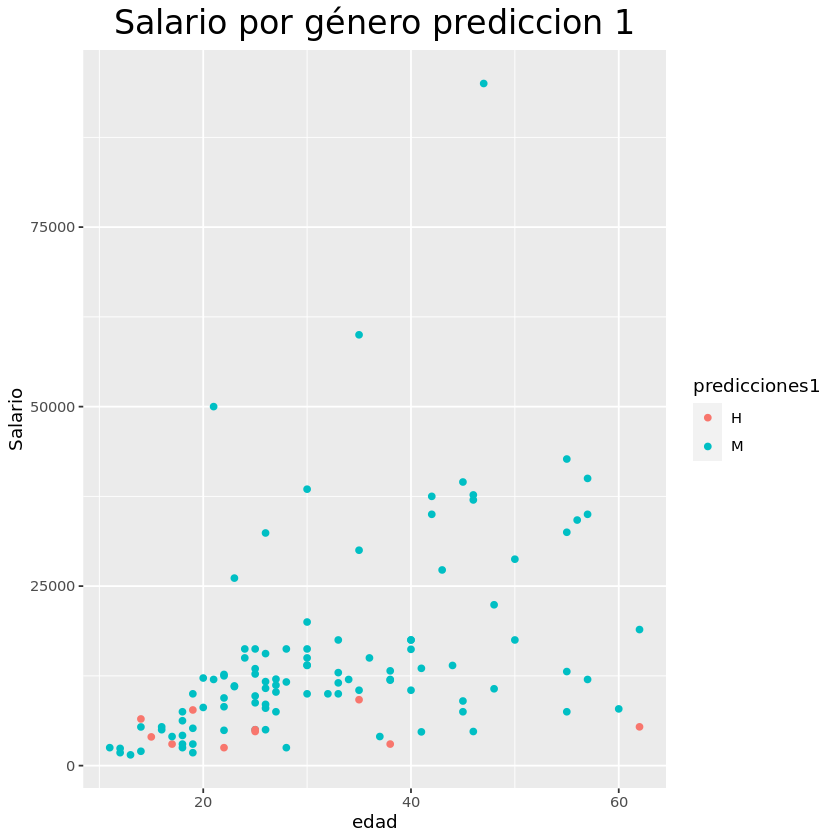

In [14]:
informacion + geom_point(datos, mapping = aes (x=edad, y=Salario, color=predicciones1)) +
ggtitle ('Salario por género prediccion 1') + theme(plot.title =element_text (size=20, hjust=0.5))

In [15]:
predicciones2 <- data.frame(predict.glm(logit2, datos, type='response'))

In [16]:
predicciones2 <- ifelse(predicciones2 > 0.5, 'H', 'M')

In [17]:
datos <-datos %>% mutate(Predicion_modelo2=predicciones2)

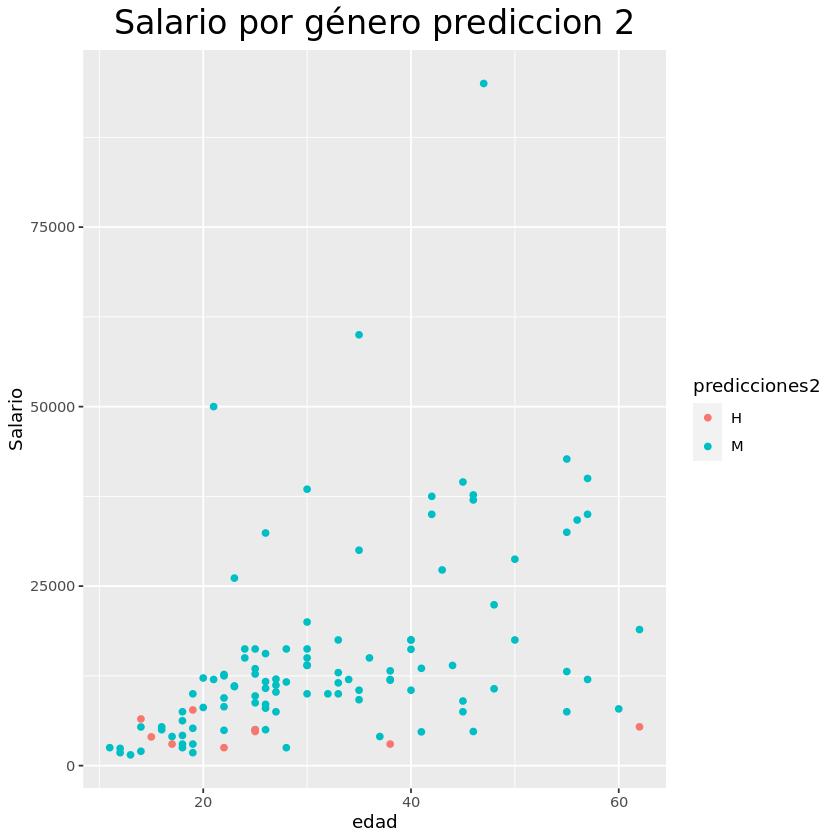

In [18]:
informacion + geom_point(datos, mapping = aes (x=edad, y=Salario, color=predicciones2)) +
ggtitle ('Salario por género prediccion 2') + theme(plot.title =element_text (size=20, hjust=0.5))

Realizamos la comparativa de las cada una de las predicciones con los datos reales para conocer que tan acertado es cada modelo

In [19]:
datos$Predicion_modelo_numeric <- ifelse(datos$Predicion_modelo == "M",0,1)

In [20]:
datos$Predicion_modelo2_numeric <- ifelse(datos$Predicion_modelo2 == "M",0,1)

In [21]:
mean (datos$Predicion_modelo_numeric == datos$Genero)

[1] 0.7807018

In [22]:
mean (datos$Predicion_modelo2_numeric == datos$Genero)

[1] 0.7894737

Para el caso del primer modelo tenemos un 78% de precisión mientras que para el segundo modelo es de 79%

## Modelo dummy

Si consideramos un modelo "dummy" que únicamente asigna valor 0 ¿cuánta precisión se obtiene?

In [23]:
datos$modelo_dummy <- rep(0, 114)

In [24]:
mean (datos$modelo_dummy == datos$Genero)

[1] 0.7807018

Entonces el modelo por regresión logística ajustado tiene la misma precisión que este modelo "dummy" por lo que hay que revisar el ajuste, el punto de corte o los datos. 

-> Si toman el punto de corte igual a $0.75$ para sus dos modelos obtienen la precisión de $0.789473684210526$ (chéquenlo). ¿Entonces tal precisión se debe al ajuste o sólo es una elección del punto de corte?

El valor $0.780701754385965$ corresponde al porcentaje de mujeres en los datos:

In [25]:
table(datos$Genero)


 0  1 
89 25 

In [26]:
table(datos$Genero)/114


        0         1 
0.7807018 0.2192982 

# Lo siguiente hace referencia a columna PruebaM, PruebaH que no están en el csv

Realizamos la comparitiva considerando que solo hay mujeres en el grupo

In [147]:
mean (predicciones1 == datos$PruebaM)

[1] 0.9122807

In [148]:
mean (predicciones2 == datos$PruebaM)

[1] 0.9210526

Para el caso del primer modelo tenemos un 91% de precisión mientras que para el segundo modelo es de 92%

Hacemos lo mismo considerando solo hombres

In [149]:
mean (predicciones1 == datos$PruebaH)

[1] 0.0877193

In [150]:
mean (predicciones2 == datos$PruebaH)

[1] 0.07894737

Cambiando el corte de acuerdo a la proporcion de hombres y mujeres 

In [157]:
predicciones1 <- data.frame(predict.glm(logit1, datos, type='response'))

In [158]:
predicciones1 <- ifelse(predicciones1 > 0.79, 'H', 'M')

In [159]:
mean (predicciones1 == datos$genero)

[1] 0.7807018

In [160]:
predicciones2 <- data.frame(predict.glm(logit2, datos, type='response'))

In [161]:
predicciones2 <- ifelse(predicciones2 > 0.79, 'H', 'M')

In [207]:
mean (predicciones2 == datos$genero)

[1] 0.7807018

Columna solo mujeres contra los datos de genero

In [209]:
mean (datos$pruebam == datos$Genero)

[1] 0.7807018